# Table of Content

1. Hypothesis Generation

2. EDA (Univariate and Bi-variate Analysis)

3. Missing Value Imputation and Outlier Detection.

4. Feature Engineering.

5. Preparing data for Model Building. 

6. Model-Building-1 using CV

7. Evaluation metrics using Accuracy_score,ROC_curve

8. Model-Building-1 using Feature Selection,Feature Scaling and Hyper-Parameter Tuning.

9. Re-Training the Model with the selected Parameters.

10. Making Predictions and the Test Data.

11. Making the Sample_Submissing with the Predictions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [69]:
train_original=pd.read_csv('train.csv')
test_original=pd.read_csv('test.csv')

In [70]:
train=train_original.copy()
test=test_original.copy()

In [71]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [73]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [74]:
train.shape,test.shape

((614, 13), (367, 12))

#### Hypothesis Generation

In order to understand Our dataset well Hypothesis Generation is very important.
In this we deceide which all features will impact the Target variables.

1. Salary : Applicants with high Salary have higher chance of paying the loan.

2. LoanAmount: If it is less then chances of Loan approval is more.

3. Loan_Amount_term: Less is the period or amount the more is the chances of Loan approval

4. EMI: Less is the EMI to be paid/ month the more is the chances of Loan approval.


In the EDA we will test our Hypothesis Generation.

## EDA

- Univariate Analysis

- Bivariate Analysis

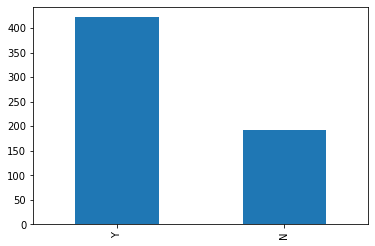

In [75]:
train['Loan_Status'].value_counts(normalize=False).plot.bar()

In [76]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [77]:
## We can see that most of the Loans are approved(68%)

Ordinal Categorical Features- Dependents,Education,Property_Area

Categorical Features- Gender,Married,Self_Employes,Loan_Status

In [78]:
cat=[]
for i in train.columns:
    if(train[i].dtypes=='object'):
        cat.append(i)

In [79]:
train[cat]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


#### Categorical Features

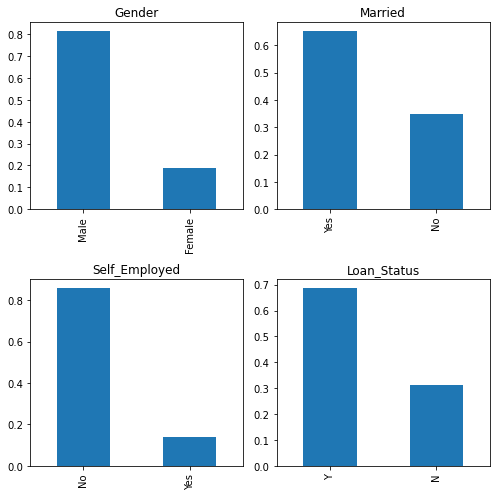

In [80]:
plt.figure(figsize=(7,7))

plt.subplot(2,2,1)
train['Gender'].value_counts(normalize=True).plot.bar()
plt.title('Gender')

plt.subplot(2,2,2)
train['Married'].value_counts(normalize=True).plot.bar()
plt.title('Married')

plt.subplot(2,2,3)
train['Self_Employed'].value_counts(normalize=True).plot.bar()
plt.title('Self_Employed')

plt.subplot(2,2,4)
train['Loan_Status'].value_counts(normalize=True).plot.bar()
plt.title('Loan_Status')

plt.tight_layout()

plt.savefig("categorical_features.png")
plt.show()

1. We can say that about 80% are Male
2. We can say that about 65% are Married
3. We can say that about 85% are not Self-Employeed
4. We can say that about 65% loans are Approved.

#### Ordinal Features

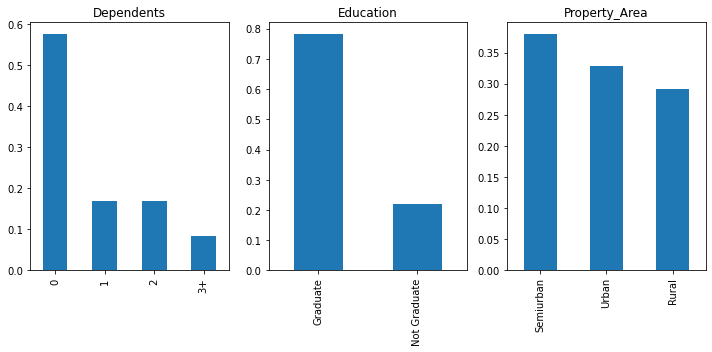

In [81]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
train['Dependents'].value_counts(normalize=True).plot.bar()
plt.title('Dependents')

plt.subplot(1,3,2)
train['Education'].value_counts(normalize=True).plot.bar()
plt.title('Education')

plt.subplot(1,3,3)
train['Property_Area'].value_counts(normalize=True).plot.bar()
plt.title('Property_Area')

plt.tight_layout()
plt.show()

1. We can say that There are many 0 dependents.
2. Most applicants are graduate.
3. Most applicants belong to Seni-urba area

#### Numrical Data

C:\Users\Dishaa\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dishaa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


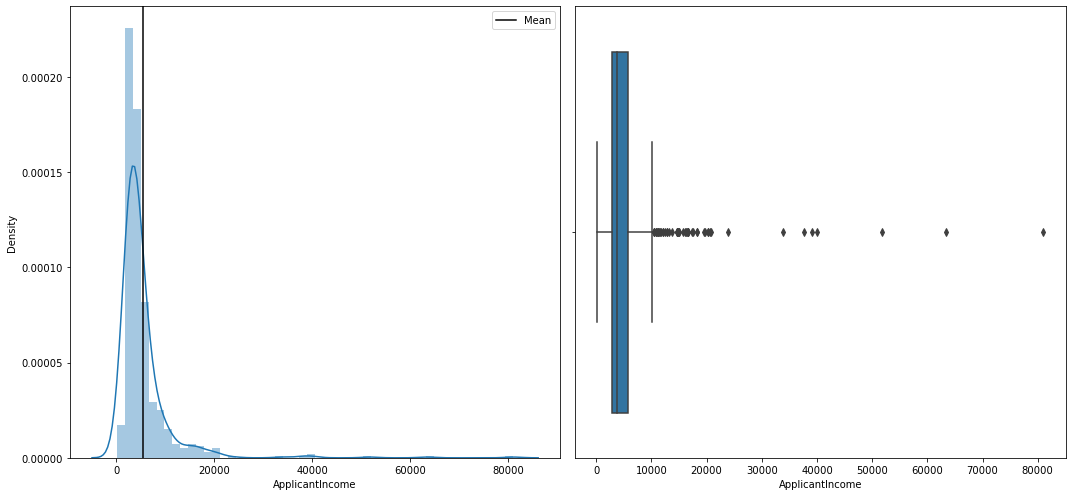

In [82]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.distplot(train['ApplicantIncome'])
plt.axvline(train['ApplicantIncome'].mean(),c='k',label='Mean')
plt.legend()


plt.subplot(1,2,2)
sns.boxplot(train['ApplicantIncome'])

plt.tight_layout()

plt.savefig("numerical_features.png")
plt.show()

We can clearly see that the data is heavy right skewed and not Normally distributed.
Also the boxplot shows that there are alot of outliers present.

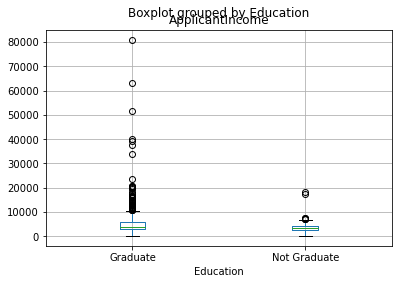

In [83]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.show()

We can see that Graduates have the highest Salary with many outliers.

C:\Users\Dishaa\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dishaa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


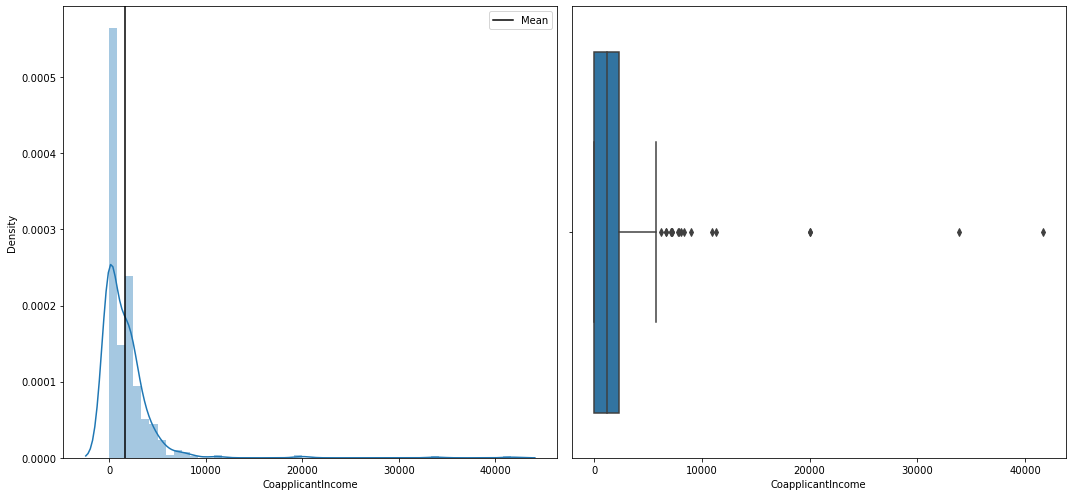

In [84]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.distplot(train['CoapplicantIncome'])
plt.axvline(train['CoapplicantIncome'].mean(),c='k',label='Mean')
plt.legend()

plt.subplot(1,2,2)
sns.boxplot(train['CoapplicantIncome'])

plt.tight_layout()
plt.show()

We can see that CoapplicantIncome is not normally distributed and has outliers present on the higher side .

C:\Users\Dishaa\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dishaa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


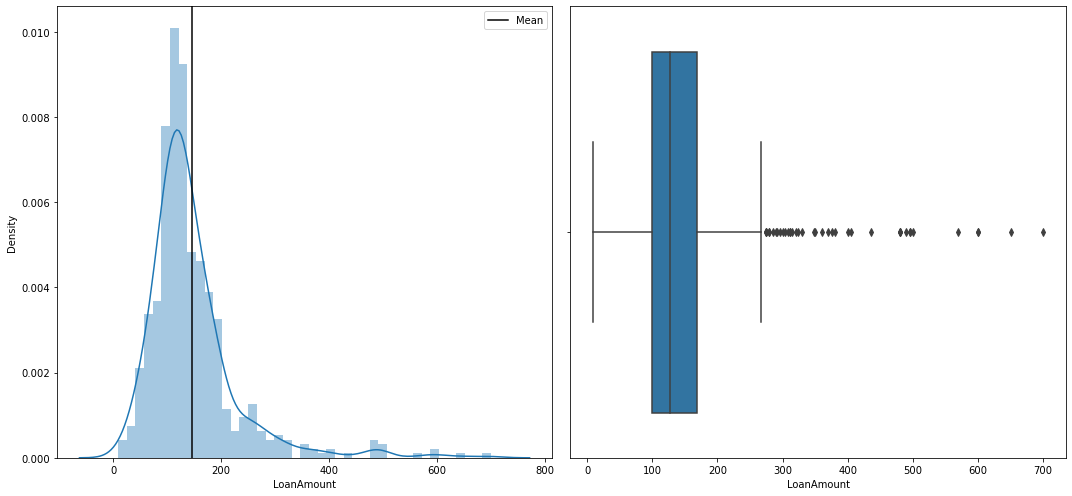

In [85]:

plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.distplot(train['LoanAmount'])
plt.axvline(train['LoanAmount'].mean(),c='k',label='Mean')
plt.legend()

plt.subplot(1,2,2)
sns.boxplot(train['LoanAmount'])

plt.tight_layout()
plt.show()

We can see that LoanAmount has fairly Normal distribution but still has Outliers .

### Bivariate Analysis

In [86]:
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']


#### Categorical V/S Target Variable

In [87]:
Gender_tab=pd.crosstab(train['Gender'],train['Loan_Status'],normalize='index')
Gender_tab

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


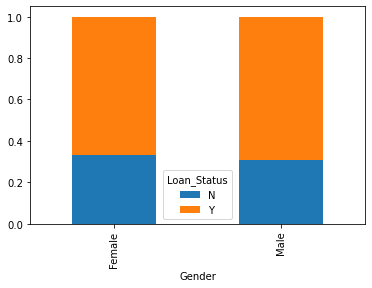

In [88]:
Gender_tab.plot(kind='bar',stacked=True)

plt.savefig("categorical_bivariate_analysis.png")

plt.show()

We can see that Loan Approval for both Genders is almost same 

In [89]:
Married_tab=pd.crosstab(train['Married'],train['Loan_Status'],normalize='index')
Married_tab

Loan_Status,N,Y
Married,,
No,0.370892,0.629108
Yes,0.283920,0.716080


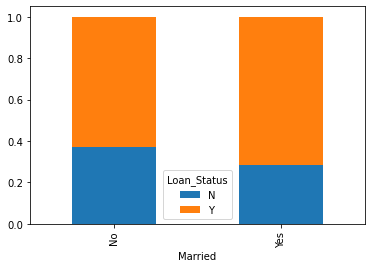

In [90]:
Married_tab.plot(kind='bar',stacked=True)

We can see that married applicants have a higher chance of getting Loan approval

In [91]:
Dependents_tab=pd.crosstab(train['Dependents'],train['Loan_Status'],normalize='index')
Dependents_tab

Loan_Status,N,Y
Dependents,,
0,0.310145,0.689855
1,0.352941,0.647059
2,0.247525,0.752475
3+,0.352941,0.647059


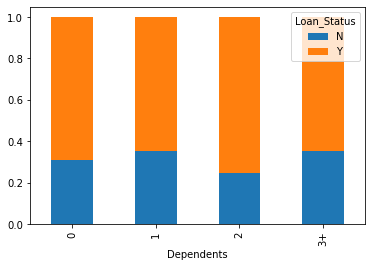

In [92]:
Dependents_tab.plot(kind='bar',stacked=True)

Distribution across 1 or 3+ is more or less Similar.

Loan_Status          N         Y
Education                       
Graduate      0.291667  0.708333
Not Graduate  0.388060  0.611940


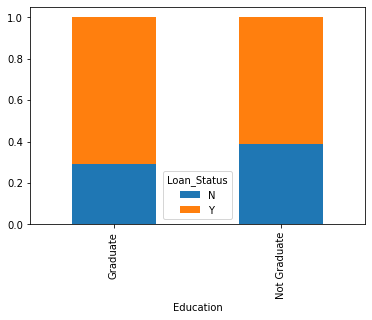

In [93]:
Education_tab=pd.crosstab(train['Education'],train['Loan_Status'],normalize='index')
print(Education_tab)
Education_tab.plot(kind='bar',stacked=True)

Graduates have a higher chance for Loan_ Approval

Loan_Status           N         Y
Self_Employed                    
No             0.314000  0.686000
Yes            0.317073  0.682927


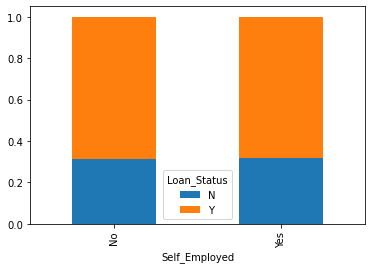

In [94]:
Self_Employed_tab=pd.crosstab(train['Self_Employed'],train['Loan_Status'],normalize='index')
print(Self_Employed_tab)
Self_Employed_tab.plot(kind='bar',stacked=True)

Loan_Status           N         Y
Property_Area                    
Rural          0.385475  0.614525
Semiurban      0.231760  0.768240
Urban          0.341584  0.658416


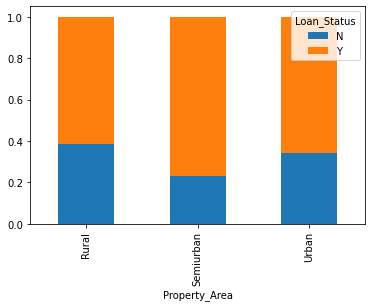

In [95]:
Property_Area_tab=pd.crosstab(train['Property_Area'],train['Loan_Status'],normalize='index')
print(Property_Area_tab)
Property_Area_tab.plot(kind='bar',stacked=True)

Ppl from Semi-Urban area have a higher chance for Loan approval

#### Numeric V/S Categorical Features

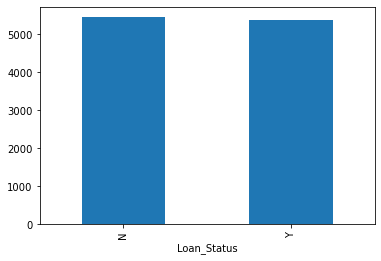

In [96]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [97]:
## Now we will try to do this with the help of bins.

bins=[0,2000,4000,6000,81000]
group=['low','Average','High','Very High']

train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
train['Income_bin_range']=pd.cut(train['ApplicantIncome'],bins)

In [98]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Income_bin_range
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,"(4000, 6000]"
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,"(4000, 6000]"
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,"(2000, 4000]"
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,"(2000, 4000]"
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,"(4000, 6000]"


In [99]:
Income_tab=pd.crosstab(train['Income_bin'],train['Loan_Status'],normalize='index')
print(Income_tab)

Loan_Status         N         Y
Income_bin                     
low          0.390244  0.609756
Average      0.290102  0.709898
High         0.314685  0.685315
Very High    0.335766  0.664234


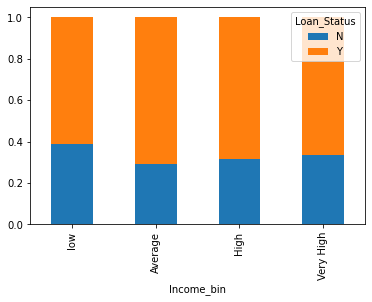

In [100]:
Income_tab.plot(kind='bar',stacked=True)

plt.savefig("numerical_bivariate_analysis.png")

plt.show()

This contradicts our statement as "Higher Income more is the chaces of Loan Approval".

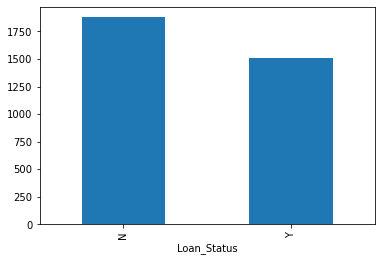

In [101]:
train.groupby('Loan_Status')['CoapplicantIncome'].mean().plot.bar()

In [102]:
bins=[0,1000,3000,42000]
group=['low','Average','High']

train['CoapplicantIncome_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
train['CoapplicantIncome_bin_range']=pd.cut(train['CoapplicantIncome'],bins)

In [103]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Income_bin_range,CoapplicantIncome_bin,CoapplicantIncome_bin_range
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,"(4000, 6000]",NaN,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,"(4000, 6000]",Average,"(1000.0, 3000.0]"
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,"(2000, 4000]",NaN,NaN
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,"(2000, 4000]",Average,"(1000.0, 3000.0]"
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,"(4000, 6000]",NaN,NaN


Loan_Status                   N         Y
CoapplicantIncome_bin                    
low                    0.136364  0.863636
Average                0.274775  0.725225
High                   0.329897  0.670103


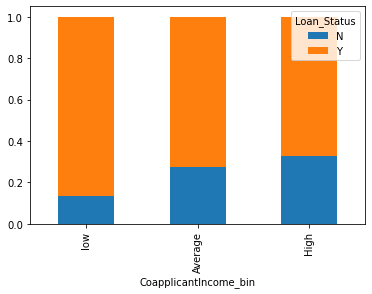

In [104]:
CoapplicantIncome_tab=pd.crosstab(train['CoapplicantIncome_bin'],train['Loan_Status'],normalize='index')
print(CoapplicantIncome_tab)

CoapplicantIncome_tab.plot(kind='bar',stacked=True)

Something is not right. As this is also defying our Hypothesis.

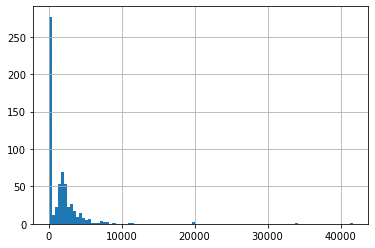

In [105]:
train['CoapplicantIncome'].hist(bins=100)

## There are so many Nan/ 0 values.

This might give us the insight that Many Applicants do not have any Coapplicant hence the 0 income.

In [106]:
## Now let us combine both the features and see its effect on the Target.

train['Total_income']=train['CoapplicantIncome']+train['ApplicantIncome']

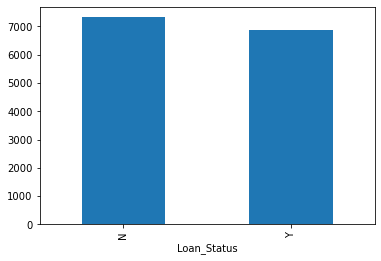

In [107]:
train.groupby('Loan_Status')['Total_income'].mean().plot.bar()

In [108]:
bins=[0,2000,4000,6000,81000]
groups=['low','average','high','Very_high']

train['Total_Income_bins']=pd.cut(train['Total_income'],bins,labels=groups)
train['Total_Income_bins_range']=pd.cut(train['Total_income'],bins)

In [109]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Income_bin_range,CoapplicantIncome_bin,CoapplicantIncome_bin_range,Total_income,Total_Income_bins,Total_Income_bins_range
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,"(4000, 6000]",NaN,NaN,5849.0,high,"(4000, 6000]"
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,"(4000, 6000]",Average,"(1000.0, 3000.0]",6091.0,Very_high,"(6000, 81000]"
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,"(2000, 4000]",NaN,NaN,3000.0,average,"(2000, 4000]"
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,"(2000, 4000]",Average,"(1000.0, 3000.0]",4941.0,high,"(4000, 6000]"
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,"(4000, 6000]",NaN,NaN,6000.0,high,"(4000, 6000]"


Loan_Status               N         Y
Total_Income_bins                    
low                0.833333  0.166667
average            0.299270  0.700730
high               0.290179  0.709821
Very_high          0.327935  0.672065


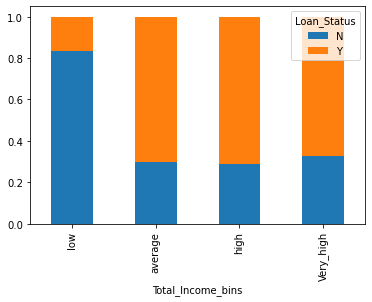

In [110]:
Total_income_tab=pd.crosstab(train['Total_Income_bins'],train['Loan_Status'],normalize='index')
print(Total_income_tab)

Total_income_tab.plot(kind='bar',stacked=True)

Now the graph makes more sense as Applicants with low income are unlikely to get Loan approved.

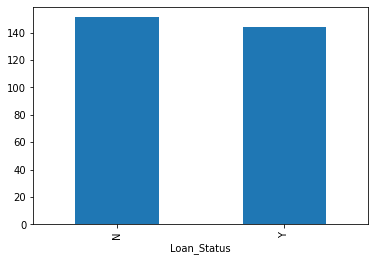

In [111]:
train.groupby('Loan_Status')['LoanAmount'].mean().plot.bar()

In [112]:
train['LoanAmount'].max()

700.0

In [113]:
bins=[0,100,200,700]
groups=['Low','average','high']

train['LoanAmount_bins']=pd.cut(train['LoanAmount'],bins,labels=groups)
train['LoanAmount_bins_range']=pd.cut(train['LoanAmount'],bins)

In [114]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Loan_Status,Income_bin,Income_bin_range,CoapplicantIncome_bin,CoapplicantIncome_bin_range,Total_income,Total_Income_bins,Total_Income_bins_range,LoanAmount_bins,LoanAmount_bins_range
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,...,Y,High,"(4000, 6000]",NaN,NaN,5849.0,high,"(4000, 6000]",NaN,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,...,N,High,"(4000, 6000]",Average,"(1000.0, 3000.0]",6091.0,Very_high,"(6000, 81000]",average,"(100.0, 200.0]"
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,...,Y,Average,"(2000, 4000]",NaN,NaN,3000.0,average,"(2000, 4000]",Low,"(0.0, 100.0]"
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,...,Y,Average,"(2000, 4000]",Average,"(1000.0, 3000.0]",4941.0,high,"(4000, 6000]",average,"(100.0, 200.0]"
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,...,Y,High,"(4000, 6000]",NaN,NaN,6000.0,high,"(4000, 6000]",average,"(100.0, 200.0]"


Loan_Status             N         Y
LoanAmount_bins                    
Low              0.305195  0.694805
average          0.287709  0.712291
high             0.387500  0.612500


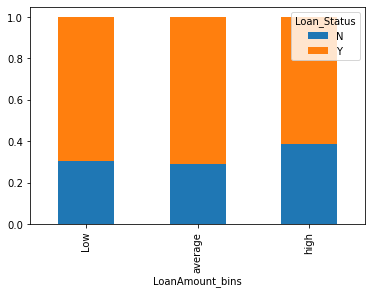

In [115]:

LoanAmount_tab=pd.crosstab(train['LoanAmount_bins'],train['Loan_Status'],normalize='index')
print(LoanAmount_tab)

LoanAmount_tab.plot(kind='bar',stacked=True)

The graph agrees with our Hypothesis that "Low loan_amount has more chances of Approval".

##### Now we will drop the bins that we have created and convrt the Target feature into (0 and 1) for the sake of model building as some models only take numeric data.

In [116]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Loan_Status,Income_bin,Income_bin_range,CoapplicantIncome_bin,CoapplicantIncome_bin_range,Total_income,Total_Income_bins,Total_Income_bins_range,LoanAmount_bins,LoanAmount_bins_range
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,...,Y,High,"(4000, 6000]",NaN,NaN,5849.0,high,"(4000, 6000]",NaN,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,...,N,High,"(4000, 6000]",Average,"(1000.0, 3000.0]",6091.0,Very_high,"(6000, 81000]",average,"(100.0, 200.0]"
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,...,Y,Average,"(2000, 4000]",NaN,NaN,3000.0,average,"(2000, 4000]",Low,"(0.0, 100.0]"
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,...,Y,Average,"(2000, 4000]",Average,"(1000.0, 3000.0]",4941.0,high,"(4000, 6000]",average,"(100.0, 200.0]"
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,...,Y,High,"(4000, 6000]",NaN,NaN,6000.0,high,"(4000, 6000]",average,"(100.0, 200.0]"


In [117]:
train=train.drop(['Income_bin','CoapplicantIncome_bin','Income_bin_range','CoapplicantIncome_bin_range','Total_Income_bins','Total_income','Total_Income_bins_range','Total_Income_bins_range','LoanAmount_bins_range','LoanAmount_bins'],axis=1)

In [118]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [119]:
train['Dependents'].replace('3+','3',inplace=True)
test['Dependents'].replace('3+','3',inplace=True)

train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

In [120]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


#### Correlation Matrix



In [121]:
corr_df=train.corr()

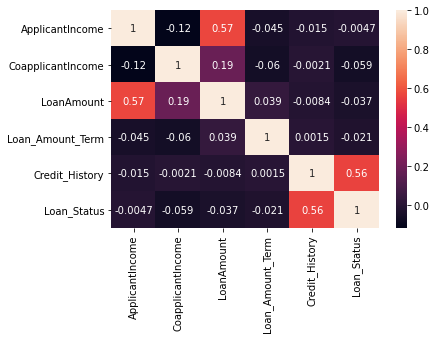

In [122]:
sns.heatmap(corr_df,annot=True)

plt.savefig("numerical_correlation_analysis_.png")

plt.show()

1. We can see that Credit_History has a very Positive correlation with Loan_Status 

2. We can see that Loan_Amount_Term has a very Negative correlation with Loan_Status 

3. Further more Loan_Amount and ApplicantIncome have a Correlation . 

### Missing Value & Outliers Imputation

Treating missing values is vey important as if not taken care of then it can cause a grave impact on the model accuracy.


In [55]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [56]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [123]:
train['Credit_History'].mode()

0    1.0
dtype: float64

In [124]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [125]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
# train['Married'].fillna(train['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)

In [126]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

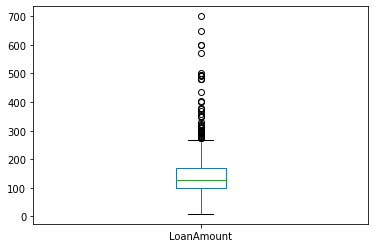

In [127]:
train['LoanAmount'].plot(kind='box')

plt.savefig("Outlier_analysis_.png")

plt.show()

As we can see that LoanAmount has many outliers so filling the NaN values using mean() will not be an appropriate choice.
So we will be using median() instead.

In [128]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

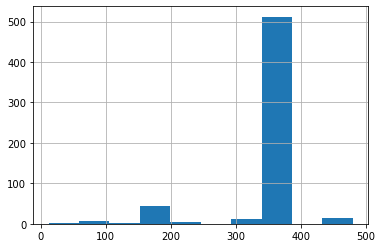

In [129]:
train['Loan_Amount_Term'].hist()

In [130]:
## Since Loan_Amount_Term has 360 as the mode as does not have many outliers so we can use mode also.

train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [131]:
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

In [132]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

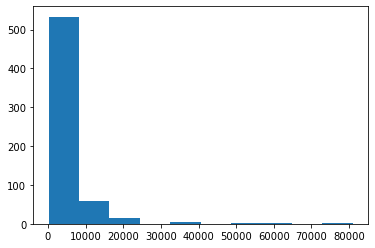

In [133]:
plt.hist(train['ApplicantIncome'])

plt.show()

<Figure size 504x504 with 0 Axes>

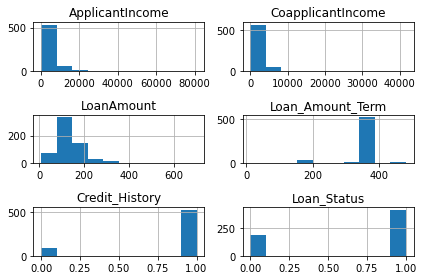

In [134]:
plt.figure(figsize=(7,7))

train.hist()

plt.tight_layout()

plt.savefig("train_data_histogram.png")

plt.show()

<Figure size 504x504 with 0 Axes>

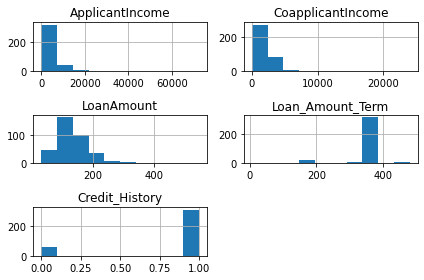

In [135]:
plt.figure(figsize=(7,7))

test.hist()

plt.tight_layout()

plt.savefig("test_data_histogram.png")

plt.show()

In [ ]:
# from sklearn.preprocessing import PowerTransformer

# pt=PowerTransformer()
# train_pt=pt.fit_transform(train)

In [136]:
# train[:,['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]

train['ApplicantIncome_log']=np.log((1+train['ApplicantIncome']))
test['ApplicantIncome_log']=np.log((1+test['ApplicantIncome']))

train['CoapplicantIncome_log']=np.log((1+train['CoapplicantIncome']))
test['CoapplicantIncome_log']=np.log((1+test['CoapplicantIncome']))

train['LoanAmount_log']=np.log((1+train['LoanAmount']))
test['LoanAmount_log']=np.log((1+test['LoanAmount']))

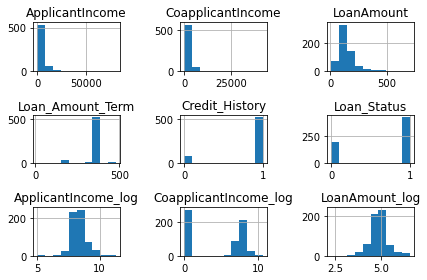

In [139]:
train.hist()

plt.tight_layout()
plt.show()

### Feature Engineering

In this section we will create new create new Features.

1. Total Income: In this feature we will combine Applicant_Income and Coapplicant_income . If high then chances of Loan    Approval is also high.

2. EMI: For this feature we can calculate by taking the ratio of Loan_Amount/Loan_Amount_term.High EMI will make ppl difficult to pay back the Loan_Amount.

3. Balance_left: This is the amount left after paying the EMI; if the Balance_left is high the chances of paying the loan_amount is also high.

In [140]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

In [141]:
train['Total_Income_log']=np.log((1+train['Total_Income']))
test['Total_Income_log']=np.log((1+test['Total_Income']))

C:\Users\Dishaa\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dishaa\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


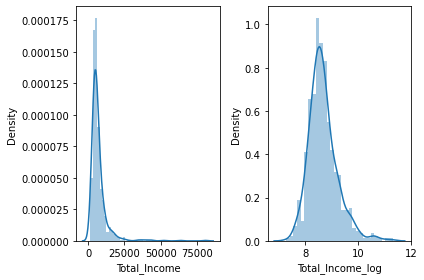

In [143]:
plt.subplot(1,2,1)
sns.distplot(train['Total_Income'])

plt.subplot(1,2,2)
sns.distplot(train['Total_Income_log'])

plt.tight_layout()

plt.savefig("Total_Income_Feature_Engineering.png")

plt.show()

In [144]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

In [145]:
train['Balance_Income']=train['Total_Income']-train['EMI']*1000
test['Balance_Income']=test['Total_Income']-train['EMI']*1000

In [ ]:
train.columns

In [146]:
train=train.drop(['ApplicantIncome','CoapplicantIncome', 'LoanAmount','Loan_Amount_Term'],axis=1)
test=test.drop(['ApplicantIncome','CoapplicantIncome', 'LoanAmount','Loan_Amount_Term'],axis=1)

In [147]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [148]:
X=train.drop('Loan_Status',axis=1)
y=train['Loan_Status']

In [149]:
X.shape,y.shape

((614, 14), (614,))

##### Now we need to do Encoding as Logistic Regression wants all of data to be in numeric form.

In [150]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [151]:
X.head()

,Credit_History,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Total_Income,Total_Income_log,EMI,Balance_Income,Gender_Female,Gender_Male,...,Dependents_1,Dependents_2,Dependents_3,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,8.674197,0.000000,4.859812,5849.0,8.674197,0.355556,5493.444444,0,1,...,0,0,0,1,0,1,0,0,0,1
1,1.0,8.430327,7.319202,4.859812,6091.0,8.714732,0.355556,5735.444444,0,1,...,1,0,0,1,0,1,0,1,0,0
2,1.0,8.006701,0.000000,4.204693,3000.0,8.006701,0.183333,2816.666667,0,1,...,0,0,0,1,0,0,1,0,0,1
3,1.0,7.857094,7.765993,4.795791,4941.0,8.505525,0.333333,4607.666667,0,1,...,0,0,0,0,1,1,0,0,0,1
4,1.0,8.699681,0.000000,4.955827,6000.0,8.699681,0.391667,5608.333333,0,1,...,0,0,0,1,0,1,0,0,0,1


In [152]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=5)

In [153]:
X_train.shape,y_test.shape

((429, 23), (185,))

### Model Building -1

In [172]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [173]:
models = []
models.append(('LR', LogisticRegression(solver='newton-cg',penalty='l2')))
models.append(('knc', KNeighborsClassifier()))
models.append(('d_tree', DecisionTreeClassifier(random_state=5)))

CV also helps us compare mean_accuracy across diffrent ML algos.

In [174]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=5)
    cv_results = cross_val_score(model, X, y, cv=kfold, \
                                 scoring='accuracy') 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
#     print(sorted(cv_results, reverse=True))

C:\Users\Dishaa\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dishaa\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dishaa\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dishaa\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Dishaa\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The 

LR: 0.807797 (0.027162)
knc: 0.607450 (0.030697)
d_tree: 0.703572 (0.006934)


#### As we can see that we are getting the best accuracy with Logistic Regression without Applying Feature Selection and Feature Scaling so for now we will proceed with Logistic Regression

### Model Building -2

In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

lr=LogisticRegression(penalty='l1',solver='liblinear')
# lr.fit(X_train,y_train)

##### Cross validation helps us to see what will our precision will be 


https://stackoverflow.com/questions/42263915/using-sklearn-cross-val-score-and-kfolds-to-fit-and-help-predict-model

In [176]:
from sklearn.model_selection import cross_val_score,cross_val_predict

scores=cross_val_score(lr,X_train,y_train,cv=5,scoring='accuracy')
print('Logistic Regression is giving us a mean accuracy of {} +- {} '.format(np.round(scores.mean(),2),np.round(scores.std(),2)))


Logistic Regression is giving us a mean accuracy of 0.8 +- 0.02 


In [177]:
lr.fit(X_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [179]:
pred=lr.predict(X_test)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

### Model Building -3

This one we will be using a Pipeline with Feature Selection combiled with Feature Scaling

In [195]:
from sklearn.feature_selection import SelectKBest,chi2,RFE,f_classif

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

In [181]:
extra_tree=ExtraTreesClassifier()
extra_tree.fit(X_train,y_train)

ExtraTreesClassifier()

In [182]:
extra_tree.feature_importances_

array([0.23944591, 0.0758502 , 0.04925098, 0.07880465, 0.08148571,
       0.08155662, 0.07961492, 0.08187913, 0.01616439, 0.01504154,
       0.01730608, 0.01467272, 0.01864199, 0.01646068, 0.01475436,
       0.01440197, 0.01062807, 0.01053912, 0.01685905, 0.0157245 ,
       0.01844084, 0.01903751, 0.01343906])

In [183]:
# fig,ax=plt.subplots(figsize=(7,7))
# ax.bar(X.columns,extra_tree.feature_importances_)
# # plt.grid(True)
# fig.autofmt_xdate()

# plt.tight_layout()

In [184]:
feature_importance_df= pd.DataFrame(extra_tree.feature_importances_, index=X.columns,columns=['Importance'])
feature_importance_df.sort_values(by='Importance',ascending=False)

,Importance
Credit_History,0.239446
Balance_Income,0.081879
Total_Income_log,0.081557
Total_Income,0.081486
EMI,0.079615
LoanAmount_log,0.078805
ApplicantIncome_log,0.075850
CoapplicantIncome_log,0.049251
Property_Area_Semiurban,0.019038
Dependents_0,0.018642


In [185]:
clf=Pipeline([('minmax',StandardScaler()),('lr',LogisticRegression())])
clf.fit(X_train,y_train)

Pipeline(steps=[('minmax', StandardScaler()), ('lr', LogisticRegression())])

In [186]:
print('The accuracy without applying Feature Selection is : {} '.format(clf.score(X_test,y_test)))

The accuracy without applying Feature Selection is : 0.8378378378378378 


In [191]:
clf=Pipeline([('kbest',SelectKBest(f_classif,k=10)),('lr',LogisticRegression())])
clf.fit(X_train,y_train)

C:\Users\Dishaa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(steps=[('kbest', SelectKBest()), ('lr', LogisticRegression())])

In [192]:
print('The accuracy with applying Feature Selection is : {} '.format(clf.score(X_test,y_test)))

The accuracy with applying Feature Selection is : 0.8324324324324325 


In [193]:
pipe=Pipeline([('scaler',StandardScaler()),('selectkbest',SelectKBest()),('model',LogisticRegression(solver='liblinear'))])

In [196]:
para={'selectkbest__k':[2,4,6,8,10,12,14],'model__C':[0.01,0.1,1.0,10.0,100.0]}

grid=GridSearchCV(pipe,param_grid=para,scoring='accuracy',cv=5)

grid.fit(X,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('selectkbest', SelectKBest()),
                                       ('model',
                                        LogisticRegression(solver='liblinear'))]),
             param_grid={'model__C': [0.01, 0.1, 1.0, 10.0, 100.0],
                         'selectkbest__k': [2, 4, 6, 8, 10, 12, 14]},
             scoring='accuracy')

In [197]:
grid.best_params_,grid.best_score_

({'model__C': 0.01, 'selectkbest__k': 2}, 0.809462881514061)

#### Now since we have gotten our Best Features, we will Re-Train our Modelusing the new Hyper-Parameters that we got.

In [198]:
select=SelectKBest(f_classif,k=4)

In [199]:
X_train_new=select.fit_transform(X_train,y_train)
X_test_new=select.transform(X_test)

In [214]:
model=LogisticRegression(solver='liblinear',C=10.0)
model.fit(X_train_new,y_train)

LogisticRegression(C=10.0, solver='liblinear')

In [201]:
pred=model.predict(X_test_new)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

#### Evauation Metrics

In [202]:
print(accuracy_score(y_test,pred))

0.8378378378378378


In [203]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 25  26]
 [  4 130]]
              precision    recall  f1-score   support

           0       0.86      0.49      0.62        51
           1       0.83      0.97      0.90       134

    accuracy                           0.84       185
   macro avg       0.85      0.73      0.76       185
weighted avg       0.84      0.84      0.82       185



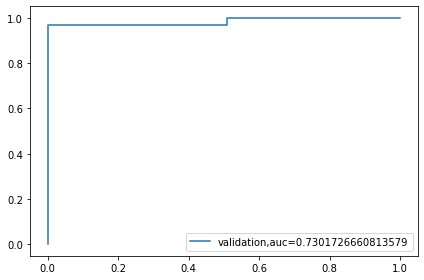

In [204]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr,tpr,_=roc_curve(y_test,pred)
auc=roc_auc_score(y_test,pred)

plt.step(fpr,tpr,label='validation,auc='+str(auc))

plt.legend(loc='best')
plt.tight_layout()
plt.savefig("ROC_AUC.png")

plt.show()

#### Prediction on Test data

In [205]:
## Prediction on test dataset

pred_test=lr.predict(test)
pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [208]:
sample=pd.read_csv('sample_submission.csv')

In [209]:
sample.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [210]:
## We fill fill the colums with our prediction.

sample['Loan_Status']=pred_test
sample['Loan_ID']=test_original['Loan_ID']

In [211]:
sample.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


#### We need to remember that Loan_Status in the sample_submission takes 'N' or 'Y' instead of 0 and 1. So we need to replace them before making the submission.

In [212]:
sample['Loan_Status'].replace(0,'N',inplace=True)
sample['Loan_Status'].replace(1,'Y',inplace=True)

In [213]:
sample.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [185]:
pd.DataFrame(sample,columns=['Loan_ID','Loan_Status']).to_csv('Logistic.csv',index=False)

In [186]:
pd.read_csv('Logistic.csv')

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y
